EDA

In [2]:
#Importacion de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Leer archivo
df=pd.read_csv('movies.csv') 
df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,nombre_actor,nombre_director,collection,genres,company,country,language,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,Tom Hanks,John Lasseter,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English,1995,12.451801
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,Tom Hanks,John Lasseter,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America,English,1995,12.451801
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,Tom Hanks,John Lasseter,Toy Story Collection,Family,Pixar Animation Studios,United States of America,English,1995,12.451801


In [4]:
#Estructura dataset
df.shape

(422229, 22)

In [5]:
# Resumen estadistico de las columnas numericas
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.222290e+05,422229.000000,422229.000000,4.222290e+05,421685.000000,422229.000000,422229.000000,422229.000000,4.222290e+05
mean,1.414142e+07,80309.264529,5.627405,3.305764e+07,108.861866,5.909601,318.465795,1999.437601,inf
std,3.187924e+07,106440.106986,9.004903,1.090892e+08,31.759617,1.458656,862.041831,17.072432,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,10075.000000,0.958683,0.000000e+00,93.000000,5.300000,7.000000,1995.000000,0.000000e+00
50%,0.000000e+00,34449.000000,3.463550,0.000000e+00,105.000000,6.100000,34.000000,2004.000000,0.000000e+00
75%,1.200000e+07,92647.000000,8.291886,7.103973e+06,122.000000,6.900000,192.000000,2010.000000,1.070143e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


In [6]:
# Resumen estadistico de las columnas no numericas 
df.describe(include=['O'])

,original_language,overview,release_date,status,tagline,title,nombre_actor,nombre_director,collection,genres,company,country,language
count,422133,419741,422229,422083,228180,422229,417096,420946,53837,419093,394922,410846,409831
unique,89,44231,17333,6,20269,42195,18341,20596,1667,20,23345,158,74
top,en,Twenty-five films from twenty-five European co...,2004-05-01,Released,France 1914. A moment of humanity that made hi...,Visions of Europe,Safia Aggoune,Aki Kaurismäki,Arn collection,Drama,Warner Bros.,United States of America,English
freq,288881,24700,24709,420200,1120,24700,24700,25093,2004,110842,5122,128912,187247


In [7]:
colm,fil = df.shape
print('Existen ', colm,' columnas y ', fil, 'filas en la tabla' )

Existen  422229  columnas y  22 filas en la tabla


In [8]:
# Ver cuantos valores nulos tengo en cada columna de la tabla
df.isnull().sum()

budget                    0
id                        0
original_language        96
overview               2488
popularity                0
release_date              0
revenue                   0
runtime                 544
status                  146
tagline              194049
title                     0
vote_average              0
vote_count                0
nombre_actor           5133
nombre_director        1283
collection           368392
genres                 3136
company               27307
country               11383
language              12398
release_year              0
return                    0
dtype: int64

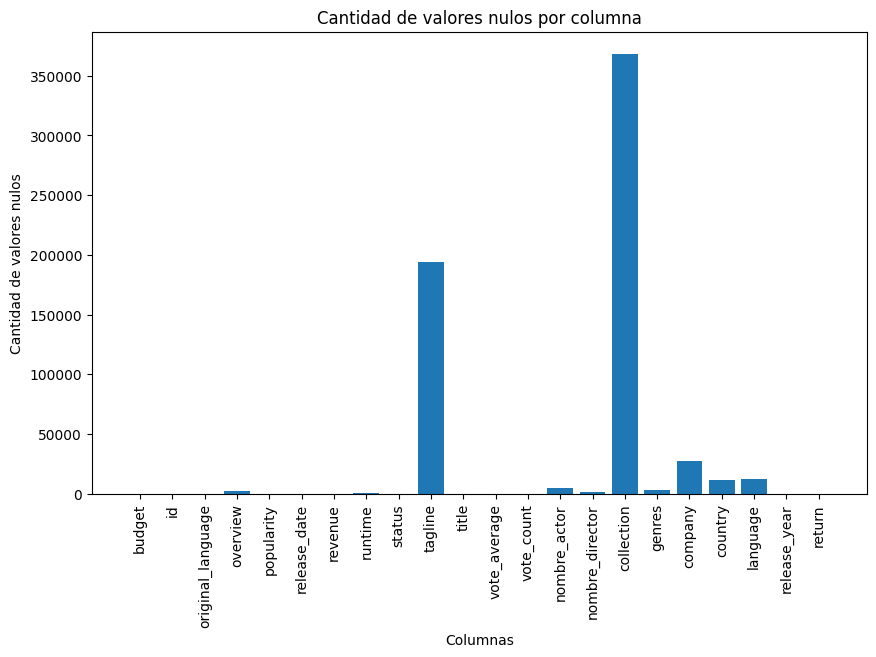

In [9]:
# Hacemos un histograma con la cantidad de valores nulos que hay por cada columna
nulos_por_columna = df.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(nulos_por_columna.index, nulos_por_columna.values)
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=90)
plt.show()

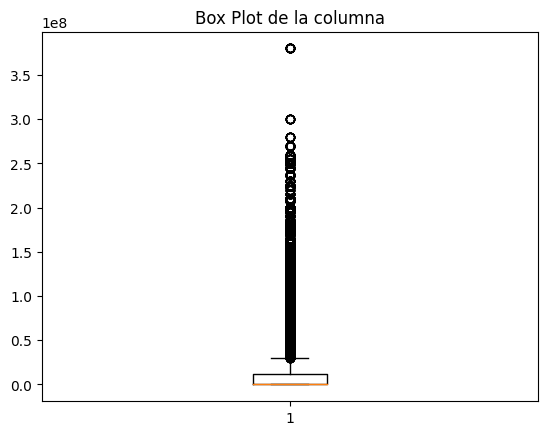

In [10]:
# Hacemos un boxplot para ver si hay algun dato atipico en la columna budget
plt.boxplot(df['budget'])
plt.title('Box Plot de la columna')
plt.show()

In [11]:
# Vemos si hay una correlacion
df_corr = df[["release_year",'budget',"popularity",
              "revenue","return"]].dropna().corr()

<AxesSubplot:>

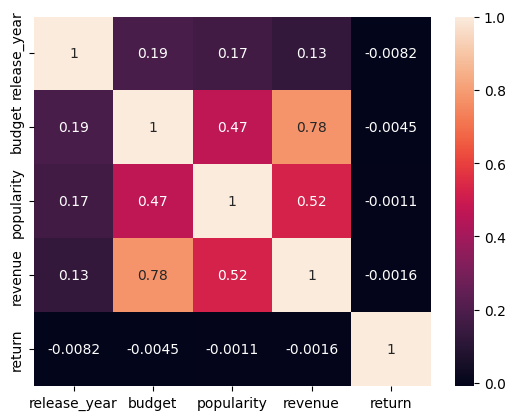

In [12]:
sns.heatmap(df_corr,annot=True)

Text(0, 0.5, 'popularity')

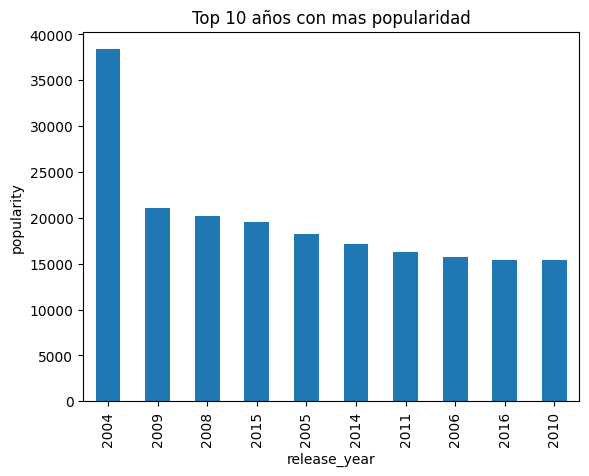

In [13]:
# Realizamos para ver el top 10 con mayor popularidad de los años
ax= df['release_year'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Top 10 años con mas popularidad')

ax.set_xlabel('release_year')
ax.set_ylabel('popularity')

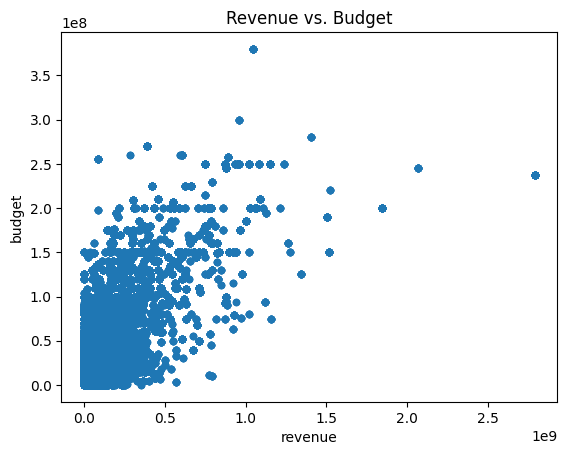

In [14]:
# Scatter
df.plot(kind='scatter',
        x = 'revenue',
        y='budget',
        title='Revenue vs. Budget')

plt.show()